# **Lab 7: Logistic Regression**

CS 412

***This lab can be conducted individually or in groups.***

In this lab, you learn how to apply the logistic regression model to recognize images of hand-written digits.

***Deadline:***
**23:59, April 19**.


<font color='red'> Please refer to `Lab_Guideline.pdf` in the same Google Drive folder as this Jupyter notebook; the guidelines there apply to all the labs.</font>



In [1]:
# Let's first import some modules for this experiment
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

## Logistic Regression {-}

In this problem, we will implement a Logistic Regression model with gradient descent from scratch. Logistic regression is a statistical model used for binary classification. We start with the fundamental mathematics and statistics behind logistic regression, and then extend it to multinomial logistic regression which can handle multi-class classification problems. To help you fully understand how they work, we will be working on a real dataset to recognize images of hand-written digits.

## 1.1 From linear regression to logistic regression (24 points){-}

In our previous lab assignment, we have learned how to use linear regression to predict the quality of wines. Actually linear regression is one of the most extensively used statistical technique for predictive modelling analysis thanks to its simplicity. Let us take a quick review of this method.

### 1.1 Recap of linear regression {-}

Linear regression assumes that the dependence of the target $y$ on the features $x_1, ..., x_m$ is linear, even if the true regression function is nonlinear. One benefit of making a linear dependence assumption is that the relationship between the target and features can be easily interpreted.

Let's define $f_w(x)$ as the hypothesis for $y$ as a function of $x\in\mathbb{R}^m$, under the weight vector $w\in\mathbb{R}^m$.  This results in the following prediction function:
$$f_w(x) = x^Tw.$$
Our goal is to find the optimal $w$ that maps $f_w(x)$ to $y$ as accurately as possible. To achieve that, we use gradient descent to minimize the squared loss as the cost function:
$$L(w) = \frac{1}{2}||x^Tw - y||^2.$$
Once we have learned the optimal $w$ from training data, we can use the learned model to predict the real value for test examples. 

In essence, linear regression is predicting continuous variables instead of binary variables. Then a natural question is whether linear regression can be used to solve classification problems. The answer is affirmative. Considering a binary classification problem, one can set up a threshold to distinguish different categories. Say if the predicted continuous value is greater than the threshold value, the data point will be classified as positive. Otherwise, it will be classified as negative. However, these predictions are not sensible for classification because the predicted values range from $-\infty$ to $\infty$ which can lead to adverse consequences in real-time. As a result, logistic regression comes to play.

### 1.2 Logistic Regression - Modeling **(8 points)** {-}

The basic idea of logistic regression is to produce probabilities out of linear regression. To achieve this, it feeds the learned score $x^Tw$ into a non-linear transformation, which is known as a sigmoid function:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
Note that the sigmoid function $\sigma(z)$ transforms an unbounded real number $z$ into the interval [0,1]:
$$
\begin{aligned}
&\sigma(z) \rightarrow 1, \quad as \quad z \rightarrow \infty\\
&\sigma(0) = \frac{1}{2}, \\
&\sigma(z) \rightarrow 0, \quad as \quad  z \rightarrow -\infty.
\end{aligned}
$$
Moreover, $\sigma(z)$ is differentiable and its derivative has a nice property
for convenient computation
$$
\begin{aligned}
\sigma'(z) &= -\frac{1}{(1+e^{-z})^2}(-e^{-z}) \\
&= \frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}} \\
&= \frac{1}{1+e^{-z}}(1 - \frac{1}{1+e^{-z}}) \\
&=\sigma(z)(1-\sigma(z)).
\end{aligned}
$$

As we can see, if we modify $f_w$ to
$$f_w(x) = \sigma(x^Tw),$$
then we have a model that outputs probabilities of an example $x$ belonging to the positive class, or in a mathematical form:
$$P(y=1|x;w) = \frac{1}{1+e^{-x^Tw}}$$
For the negative class we have
$$P(y=0|x;w) = \frac{e^{-x^Tw}}{1+e^{-x^Tw}} = 1 - P(y=1|x;w)$$
At training time, we learn the value of $w$ to yield high values for $P(y=1|x;w)$ when $x$ is a positive example, and to yield low values for $P(y=1|x;w)$ when $x$ is a negative example. 

In practice, a real dataset contains many training examples. To make the computation efficient, in this experiment, we will process all data points at once instead of one at a time. Let's assume the dataset contains $n$ examples  which allows us to assemble a feature matrix $X =[x^1, x^2, ..., x^n]^T \in\mathbb{R}^{n\times m}$, 
where $x^i$ represents the $i$-th training example, and $^T$ is matrix transpose.
Then the prediction can be written as
$$\begin{pmatrix} P(y=1|x^1;w) \\ \vdots \\ P(y=1|x^n; w)\end{pmatrix} = \frac{1}{1+e^{-Xw}},$$
where $Xw$ leads to an $n$-dimensional vector,
and all other operations on the right-hand side (e.g., exponentiation and reciprocal) are performed elementwise on a vector.

In the following code block, implement the functions `sigmoid` and `logistic_regression` that can handle *batch* inputs (see the header of the functions and the unit tests).

In [2]:
def sigmoid(z):
  """
  sigmoid function that maps inputs into the interval [0,1]
  Your implementation must be able to handle the case when z is a vector (see unit test)
  Inputs:
  - z: a scalar (real number) or a vector
  Outputs:
  - trans_z: the same shape as z, with sigmoid applied to each element of z
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
 
  trans_z = 1 / (1 + np.exp(-z))
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return trans_z

def logistic_regression(X, w):
  """
  logistic regression model that outputs probabilities of positive examples
  Inputs:
  - X: an array of shape (num_sample, num_features)
  - w: an array of shape (num_features,)
  Outputs:
  - logits: a vector of shape (num_samples,)
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  
  logits = sigmoid(X @ w)

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return logits

# unit test
# sample inputs:
# z = np.array([215, -108, 0, 0.32])
# X = np.array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
#               [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
#               [1.86260211e-01, 3.45560727e-01, 3.96767474e-01],
#               [5.38816734e-01, 4.19194514e-01, 6.85219500e-01]])
# w = np.array([0.20445225, 0.87811744, 0.02738759])

# sample outputs:
# out1 = sigmoid(z)
# out1 : [1.00000000e+00 1.24794646e-47 5.00000000e-01 5.79324252e-01]
# out2 = logistic_regression(X, w)
# out2 : [0.67212099 0.5481529  0.5871972  0.62176131]

z = np.array([215, -108, 0, 0.32])
X = np.array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
              [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
              [1.86260211e-01, 3.45560727e-01, 3.96767474e-01],
              [5.38816734e-01, 4.19194514e-01, 6.85219500e-01]])
w = np.array([0.20445225, 0.87811744, 0.02738759])
out1 = sigmoid(z)
out2 = logistic_regression(X, w)
print (out1)
print (out2)


[1.00000000e+00 1.24794646e-47 5.00000000e-01 5.79324252e-01]
[0.67212099 0.5481529  0.5871972  0.62176131]


### 1.3 Loss function **(16 points)** {-}
Recall that in linear regression, we optimize the model by minimizing the square loss:
$$L(w) = \frac{1}{2}||x^Tw - y||^2$$
This loss is a convex function w.r.t $w$, hence the local minimum is also the global minimum.

A naive way to extend linear regression to classification would be to use the loss $\frac{1}{2}||\sigma(x^Tw) - y||^2$, where $y$ is either 1 or 0 (for positive or negative, respectively).  This loss turns out very hard to optimize with an algorithm like gradient descent, because the loss function is not convex in $w$. In other words, there can be more than one local minimum and we wouldn't be assured to find the global minimum that best optimizes the loss.

Instead of minimizing the square error as in the linear regression, we can resort to maximizing the likelihood of the training set as in many other machine learning algorithms. By making the standard assumption that training examples are generated independently, the likelihood function is given by
$$
\begin{align}
L(w) &= P(y^1, ..., y^n|x^1, ..., x^n; w) \\
&= \prod_{i=1}^n P(y^i|x^i;w)\\
&= \prod_{i=1}^n (\sigma(w^T x^i))^{y^i}(1-\sigma(w^T x^i))^{1-y^i}.
\end{align}
$$

To see the last step, just enumerate the two cases of $y^i = 1$ or $0$ since we are considering a binary classification problem.
To simplify the computation, let us maximize the logarithm of the likelihood,
which is equivalent to minimizing $-\frac{1}{n}$ times the log-likelihood:
$$
\begin{align}
\ell(w) &= -\frac{1}{n}\log \prod_{i=1}^n (\sigma(w^T x^i))^{y^i}(1-\sigma(w^T x^i))^{1-y^i} \\
&= \frac{1}{n}\sum_{i=1}^n \left[-{y^i}\log(\sigma(w^T x^i)) - (1-y^i)\log(1-\sigma(w^T x^i))\right].
\tag{1}
\end{align}
$$

The term inside the square bracket is generally referred to as cross-entropy loss, or logistic loss.
That is, for a given data point $\{x, y\}$,
it can be written as two cases: 
$$
\begin{align}
\ell(x; w) &= 
-{y}\log(\sigma(w^T x)) - (1-y)\log(1-\sigma(w^T x)) \\
\tag{2}
&= \begin{cases}
-\log(1-\sigma(x^Tw)) & \text{if } y=0\\
-\log(\sigma(x^Tw))    & \text{if } y=1\\
\end{cases}
\end{align}
$$

In practice, we surely implement Eq 2 based on the value of $y$.
Eq 1, however, gives more convenience in mathematical derivation as it unifies two cases neatly.
If we plot the curve of $\ell(x; w)$ as a function of $w$, we will see it is a convex function and therefore the gradient descent algorithm can find its global minima. Just like in linear regression, we will use the derivative of the loss function to calculate a gradient descent step. Please derive 

1. The gradient of $\ell(x; w)$ in Eq 2 with respect to (w.r.t.) $w$. 
<font color='red'> Fill your solution in the following line </font>: 

$$\nabla_w\ell(x;) = $$ 


2. the gradient of $\ell(w)$ in Eq 1 w.r.t. $w$.  For computational efficiency, we would like to express it in terms of two the feature matrix $X = (x^1, x^2, ..., x^n)^T \in\mathbb{R}^{n\times m}$ and the label vector $Y = (y^1, y^2, ..., y^n)\in\mathbb{R}^n$).  <font color='red'> Fill your solution in the following line </font>:

$$\nabla_w\ell(w) = $$ 

Then, implement a function `logistic_loss` that computes $\ell(w)$ and the gradient in $w$.  You are strongly recommended to use the matrix/vector implementation as introduced in the class, as opposed to Figure 10.6 of the textbook.


In [3]:
def logistic_loss(X, w, y):
  """
  a function that compute the loss value for the given dataset (X, y) and parameter w;
  It also returns the gradient of loss function w.r.t w
  Here (X, y) can be a set of examples, not just one example.
  Inputs:
  - X: an array of shape (num_sample, num_features)
  - w: an array of shape (num_features,)
  - y: an array of shape (num_sample,), it is the ground truth label of data X
  Output:
  - loss: a scalar which is the value of loss function for the given data and parameters
  - grad: an array of shape (num_featues,), the gradient of loss 
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
 
  N = y.shape[0]
  loss = (1 / N) * (-y @ np.log(sigmoid(X @ w)) - (1 - y) @ np.log(1 - sigmoid(X @ w)))
  grad = (1 / N) * (sigmoid(X @ w) - y) @ X

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return loss, grad
#unit test
# inputs:
# X = np.array([[0.67046751, 0.41730480, 0.55868983],
#               [0.14038694, 0.19810149, 0.80074457],
#               [0.96826158, 0.31342418, 0.69232262],
#               [0.87638915, 0.89460666, 0.08504421]])
# w = np.array([0.03905478, 0.16983042, 0.8781425 ])
# Y = np.array([1, 1, 0, 1] )

# sample outputs:
# loss, grad = logistic_loss(X, w, Y)
# loss: 0.626238298577102
# grad: [-0.00483685, -0.09821878, -0.0080873 ]

X = np.array([[0.67046751, 0.41730480, 0.55868983],
              [0.14038694, 0.19810149, 0.80074457],
              [0.96826158, 0.31342418, 0.69232262],
              [0.87638915, 0.89460666, 0.08504421]])
w = np.array([0.03905478, 0.16983042, 0.8781425 ])
Y = np.array([1, 1, 0, 1])
loss, grad = logistic_loss(X, w, Y)
print (loss, grad)


0.626238298577102 [-0.00483685 -0.09821878 -0.0080873 ]


## 2 Recognizing hand-written digits with logistic regression (26 points){-}

We have gone through all the theoretical concepts of the logistic regression model. It's time to put hands on a real problem in which we aim to recognize images of hand-written digits. The dataset we will use is the Optical Recognition of Handwritten Digits dataset, and the description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). 

### 2.1 Data preprocessing (not for grading){-}
The original dataset contains 10 classes (digits 0 to 9). Since for now we are concerned about logistic regression for binary classification, we will only use a subset of the dataset that contains 360 examples from 2 classes (digits 0 and 1).  Each example is a $8\times 8$ matrix (image) where each element is an integer in the range $[0,16]$. Let's load the dataset by using the off-the-shell method from `sklearn` and print out some images to get a good understanding of the dataset.

In [4]:
# set up the code for this experiment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline
np.random.seed(1)

# load the digits dataset
digits = load_digits(n_class=2)
# digits is a dictionary-like object that hold all the features and labels,
# along with some metadata about the dataset. 
# The features are stored in the '.data' member, a (#sample, #feature) array. 
# The labels are stored in the '.target' member.

print(f'There are {len(digits.target)} examples in total.')
print(f'All examples are images of hand-written digit {list(set(digits.target))[0]} or hand-written digits {list(set(digits.target))[1]}')
print(f'Each example is an array of shape {digits.data[0].shape}')
print(f'An example of data point:\n{digits.data[0]}')

# You may wondering why the shape of data is (64,) instead of (8, 8). Actually,
# You can access to matrix shape of data through the '.images' member.
print(f'The shape of image is {digits.images[0].shape}') 
print(f'An example of 2D array data:\n {digits.images[0]}')

There are 360 examples in total.
All examples are images of hand-written digit 0 or hand-written digits 1
Each example is an array of shape (64,)
An example of data point:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
The shape of image is (8, 8)
An example of 2D array data:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


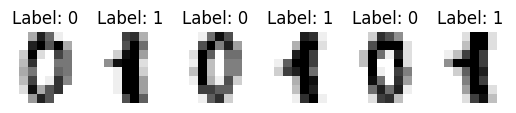

In [5]:
# The data we are interested in is made up of 8x8 images of digits. 
# Let's have a look at the first 6 images that are drawn from the dataset. 
# For these images, 
#   we know the digit they represented is given in the 'target' of the dataset.
_, axes = plt.subplots(1, 6)
img_label = list(zip(digits.images, digits.target))
for ax, (img, target) in zip(axes, img_label[:6]):
  ax.set_axis_off()
  ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Label: %i' % target)
plt.show()

### 2.2 Padding features (not for grading) {-}
As we did in Lab 2, to simplify the notation, we pad the input $x$ by inserting 1 to the **beginning** so that we can absorb the bias term into the parameter $w$.

The following code morphs the variable `digits.data` by concatenating 1 and features.

In [6]:
ones = np.ones(digits.data.shape[0]).reshape(-1, 1)
digits.data = np.concatenate((ones, digits.data), axis=1)
print(digits.data.shape)

(360, 65)


### 2.3 Create training and test sets (not for grading) {-}
As we have practiced in our previous lab assignment, we will use the `train_test_split()` method to partition the dataset into training and test sets. In this experiment, we use 80% data for training and the remaining 20% data for testing. To ensure your results are replicable, we will set the `random_state` argument of `train_test_split()` to **1**.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8, random_state=1)
print(f'The training set contains {X_train.shape[0]} examples.')
print(f'The testing set contains {X_test.shape[0]} examples.')

The training set contains 288 examples.
The testing set contains 72 examples.


### 2.4 Feature Normalization (not for grading) {-}
In the previous lab assignment, we have implemented the function `featureNormalization()` to normalize the features that have different scale. In this lab, we will learn to use the built-in function `StandardScaler()` in `scikit-learn`. As we did in `featureNormalization()`, `StandardScaler()` returns standardized features by removing the mean and scaling to unit variance.
Please read through the [API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for detailed instructions.

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### 2.5 Training the model with gradient descent **(26 points)**{-}
Now after all the pre-processing, we can train a logisitic regression model with the training data.  It is quite straightforward to make predictions on test data by using the learned model. To simplify the task, when the probability of being positive is greater than 0.5, we classify the sample to 1. Otherwise, we classify it to 0.

In this part, we will train the model with gradient descent. After that, predict the label for test examples and compute the test accuracy. You may want to follow the procedures below to obtain the results:
+ Randomly initialize the parameter $w$ by `np.random.rand`.
+ Use gradient descent to update $w$ (number of iteration `num_iters` and learning rate `lr` are provided).
+ Plot the curve of the $\ell(w)$ value as a function of how many update steps have been taken (you need a variable to store the history of $\ell(w)$ values).
+ Compute and report the test accuracy on test set.

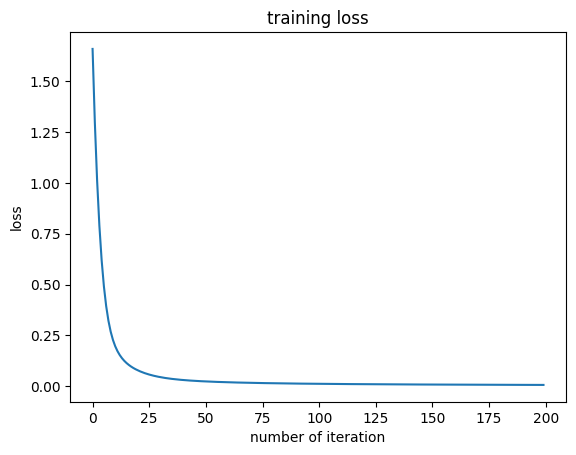

Testing accuracy is:  97.22222222222221 %


In [32]:
num_iters = 200
lr = 0.1

# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
number_of_features = X_train.shape[1]
w = np.random.rand(number_of_features)

list_of_loss_values = np.zeros(num_iters)

for i in range(num_iters):
  loss, grad = logistic_loss(X_train, w, y_train)
  w = w - (lr * grad)
  list_of_loss_values[i] = loss

plt.figure()
plt.plot(range(len(list_of_loss_values)), list_of_loss_values)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.title('training loss')
plt.show()

y_pred = np.round(logistic_regression(X_test, w))
acc = np.mean(y_pred == y_test)
print('Testing accuracy is: ', (acc * 100),'%')

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

## 3. Multinomial (multi-class) Logistic Regression (MLR) (50 points){-}

So far we have built a logisitic regression model for binary classification. In this section, we aim to extend it to multinomial logistic regression for solving multi-class classification. More specifically, we expect the MLR model can predict one out of $k$ possible classes, where $k$ is the total number of classes. 

Recall that in binary logisitic regression, the output of the model is the probability of the positive class. Analogously, the MLR model should perform a series of mathematical operations to produce a vector encoding the probability that an example $x$ belongs to each class:
$$
\begin{aligned}
\begin{pmatrix}
  P(y=1|x; W) \\
  \vdots \\
  p(y=k|x; W)
\end{pmatrix},
\quad where \quad
W = (w_1, \ldots, w_k).
\end{aligned}
$$

Here $w_1, \ldots, w_k$ are all $m$-dimensional vectors, one for each class.
$W$ is an $m$-by-$k$ matrix.
The class with the highest probability will be adopted as the prediction outcome for the given data $x$. 
Now the question is, how does the MLR model covert features to probability values? In binary logistic regression, we used the sigmoid function. 
In MLR, we can use the `softmax` to covert $(w_1^T x, \ldots, w_k^T x)$ (which are often called logits) to probability values. 
For a $k$-class problem, this conversion formula is 
$$
P(y=i|x; W) = \frac{e^{w_i^Tx}}{\sum_{j=1}^k e^{w_j^Tx}}.
$$
We will simply write
$$
\begin{aligned}
\begin{pmatrix}
  P(y=1|x; W) \\
  \vdots \\
  p(y=k|x; W)
\end{pmatrix}
=
softmax (W^\top x).
\end{aligned}
$$
To summarize, a weight vector $w_i$ is learned for each class,
which produces $k$ logits $\{w_i^T x\}_{i=1}^k$ for each example. Then `softmax` is subsequently applied to these logits to derive the probabilities for different classes.

**(8 points)** Please implement `softmax()` and `MLR()` functions in the following code block. 



In [30]:
def softmax(x):
  """
  Convert logits for each possible outcomes to probability values.
  In this function, we assume the input x is a 2D matrix of shape (num_sample, num_classes).
  So we need to normalize each row by applying the softmax function.
  Inputs:
  - x: an array of shape (num_sample, num_classse) which contains the logits for each input
  Outputs:
  - probability: an array of shape (num_sample, num_classes) which contains the
                 probability values of each class for each input
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  #For numerical stability, you can consider to subtract the maximium of X to avoid overflow: all elements in x - maxvalue in x 
 
  max_row = np.max(x, axis=1, keepdims=True)
  numerator = np.exp(x - max_row)
  denominator = np.sum(np.exp(x - max_row), axis=1, keepdims=True)
  probability = numerator / denominator

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return probability

def MLR(X, W):
  """
  performs logistic regression on given inputs X
  Inputs:
  - X: an array of shape (num_sample, num_feature)
  - W: an array of shape (num_feature, num_class)
  Outputs:
  - probability: an array of shape (num_sample, num_classes)
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
 
  probability = softmax(X @ W)

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return probability

# unit test
# sample inputs:
# X = np.array([[0.49157316, 0.05336255, 0.57411761],
#               [0.14672857, 0.58930554, 0.69975836],
#               [0.10233443, 0.41405599, 0.69440016],
#               [0.41417927, 0.04995346, 0.53589641],
#               [0.66379465, 0.51488911, 0.94459476]])
# W = np.array([[0.58655504, 0.90340192, 0.1374747, 0.13927635],
#               [0.80739129, 0.39767684, 0.1653542, 0.92750858],
#               [0.34776586, 0.75081210, 0.7259979, 0.88330609]])

# sample outputs:
# out1 = softmax(X)
# out1: [[0.36613449 0.23622627 0.39763924]
#        [0.23281662 0.36242881 0.40475457]
#        [0.23960744 0.32724969 0.43314287]
#        [0.35408647 0.24599602 0.39991751]
#        [0.31388902 0.27046263 0.41564835]]
# out2 = MLR(X, W)
# out2: 
# [[0.22210723 0.32004009 0.21385397 0.24399871]
#  [0.2278552  0.24858598 0.19040101 0.33315781]
#  [0.21922197 0.25283567 0.20870744 0.31923492]
#  [0.22296738 0.30913599 0.2195647  0.24833193]
#  [0.22047099 0.32241683 0.16806773 0.28904445]]

X = np.array([[0.49157316, 0.05336255, 0.57411761],
              [0.14672857, 0.58930554, 0.69975836],
              [0.10233443, 0.41405599, 0.69440016],
              [0.41417927, 0.04995346, 0.53589641],
              [0.66379465, 0.51488911, 0.94459476]])
W = np.array([[0.58655504, 0.90340192, 0.1374747, 0.13927635],
              [0.80739129, 0.39767684, 0.1653542, 0.92750858],
              [0.34776586, 0.75081210, 0.7259979, 0.88330609]])
out1 = softmax(X)
print (out1)
out2 = MLR(X, W)
print (out2)


[[0.36613449 0.23622627 0.39763924]
 [0.23281662 0.36242881 0.40475457]
 [0.23960744 0.32724969 0.43314287]
 [0.35408647 0.24599602 0.39991751]
 [0.31388902 0.27046263 0.41564835]]
[[0.22210723 0.32004009 0.21385397 0.24399871]
 [0.2278552  0.24858598 0.19040101 0.33315781]
 [0.21922197 0.25283567 0.20870744 0.31923492]
 [0.22296738 0.30913599 0.2195647  0.24833193]
 [0.22047099 0.32241683 0.16806773 0.28904445]]


### 3.1 Cross entropy loss **(16 points)**{-}

For the MLR model, generally, we use the cross-entropy loss which generalizes the the loss function we used in binary logistic regression
$$
\ell(W) = -\frac{1}{n}\sum_{i=1}^n y_i^T\log(p_i),
\quad \text{where} \quad  
p_i =
\begin{pmatrix}
P(y_i = 1 | x_i; W) \\
\vdots \\
P(y_i = k | x_i; W) 
\end{pmatrix}
= softmax(W^T x_i).
$$
Here $p_i\in\mathbb{R}^k$ is a probabiltiy vector of sample $x_i$. Then we apply element-wise logarithm on $p_i$ to obtain $\log(p_i)\in\mathbb{R}^k$.
In addition, $y_i$ is a one-hot vector, where the component corresponding to the correct label is 1, and all the other components are 0. 
For instance, in a 5-class classification problem (say, digits 0-4), when the ground truth label for a data point is digit 3 (i.e., the fourth class because of the digit 0), we have $y = (0, 0, 0, 1, 0)^T$.
As a result if $y_i$ encodes the fact that the true class for the $i$-th example is $c$, then $y_i^T\log(p_i)$ simply returns
$\log P(y_i = c | x_i; W)$.

Now we need to derive the gradient of $\ell(W)$ w.r.t. $W$, 
and express it in terms of $X = (x_1, x_2, ..., x_n)^T \in \mathbb{R}^{n\times m}$ and $Y=(y_1, y_2, ..., y_n)^T \in\mathbb{R}^{n\times k}$. <font color='red'> Please fill you solution in the following line </font>
$$\nabla_W\ell(W)= $$

Recall that if $\ell$ is a function that maps a matrix $W \in \mathbb{R}^{m \times k}$ to a real number, then $\nabla_W \ell(W)$ is also an $m$-by-$k$ matrix, and its $(r,s)$-th element is $\frac{\partial \ell(W)}{\partial W_{rs}}$.

Now implement the function `cross_entropy_loss` that returns $\ell(W)$ and its gradient.   You are strongly recommended to use the matrix/vector implementation as introduced in the class, as opposed to Figure 10.8 of the textbook.

In [72]:
def cross_entropy_loss(X, W, y):
  """
  Inputs:
  - X: an array of shape (num_sample, num_feature)
  - W: an array of shape (num_feature, num_class)
  - y: an array of shape (num_sample,)
  Ouputs:
  - loss: a scalar which is the value of loss function for the given data and parameters
  - grad: an array of shape (num_featues, num_class), the gradient of the loss function 
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
  N = y.shape[0]
    
  number_of_classes = W.shape[1]
  identity_matrix = np.eye(number_of_classes)
  Y = identity_matrix[y].reshape(-1, number_of_classes)

  loss = (1 / N) * -np.sum(np.where(Y==1, np.log(MLR(X, W)), 0))
  grad = (1 / N)  * (X.T @ (MLR(X, W) - Y))


  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return loss, grad

# unit test
# sample inputs:
# X = np.array([[0.49157316, 0.05336255, 0.57411761],
#               [0.14672857, 0.58930554, 0.69975836],
#               [0.10233443, 0.41405599, 0.69440016],
#               [0.41417927, 0.04995346, 0.53589641],
#               [0.66379465, 0.51488911, 0.94459476]])
# W = np.array([[0.58655504, 0.90340192, 0.1374747, 0.13927635],
#               [0.80739129, 0.39767684, 0.1653542, 0.92750858],
#               [0.34776586, 0.75081210, 0.7259979, 0.88330609]])
# y = np.array([0, 1, 1, 0, 1])

# sample outputs:
# loss, grad = cross_entropy_loss(X, W, y)
# loss:   1.3808433676397016
# grad:[[-0.10040155, -0.07022596,  0.07138434,  0.09924316],
#       [ 0.05164776, -0.21370799,  0.0615074 ,  0.10055283],
#       [-0.06861677, -0.26705505,  0.13547167,  0.20020015]]

X = np.array([[0.49157316, 0.05336255, 0.57411761],
              [0.14672857, 0.58930554, 0.69975836],
              [0.10233443, 0.41405599, 0.69440016],
              [0.41417927, 0.04995346, 0.53589641],
              [0.66379465, 0.51488911, 0.94459476]])
W = np.array([[0.58655504, 0.90340192, 0.1374747, 0.13927635],
              [0.80739129, 0.39767684, 0.1653542, 0.92750858],
              [0.34776586, 0.75081210, 0.7259979, 0.88330609]])
y = np.array([0, 1, 1, 0, 1])
loss, grad = cross_entropy_loss(X, W, y)
print (loss)
print (grad)

1.3808433676397016
[[-0.10040155 -0.07022596  0.07138434  0.09924316]
 [ 0.05164776 -0.21370799  0.0615074   0.10055283]
 [-0.06861677 -0.26705505  0.13547167  0.20020015]]


### 3.2 Learning the model on real dataset **(26 points)**{-}
In this last section, we will experiment on a subset of the hand-written digits dataset, and the task is a 10-class (also known as 10-way) classification. Compared with binary classification, the procedure of doing 10-ways classification is pretty much the same. Hence, in the following code block, you will need to train a MLR model and test it on test data. 

You can perform the following main steps to obtain the results:
+ Load the whole dataset that contains 10 classes
+ Normalize the features
+ Create training and test sets (80% for training and 20% for testing)
+ Randomly initialize the weight matrix $W$ by `np.random.rand` 
+ Update $W$ with gradient descent
+ Plot the value of $\ell(W)$ as a function of the number of gradient descent steps taken
+ Predict the label for all test examples
+ Report the test accuracy


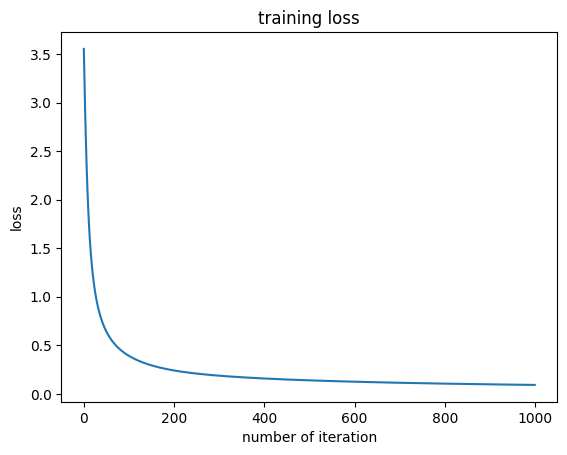

Testing accuracy is:  96.66666666666667 %


In [73]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Loading dataset, you can take 1.2.1 as reference

digits = load_digits(n_class = 10)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = 0.8, random_state = 1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

number_of_features = X_train.shape[1]
W = np.random.rand(number_of_features, 10)

num_iters = 1000
lr = 0.1
list_of_loss_values = np.zeros(num_iters)

for i in range(num_iters):
  loss, grad = cross_entropy_loss(X_train, W, y_train)
  W = W - (lr * grad)
  list_of_loss_values[i] = loss

plt.figure()
plt.plot(range(len(list_of_loss_values)), list_of_loss_values)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.title('training loss')
plt.show()

y_pred = np.argmax(MLR(X_test, W), axis = 1)
acc = np.mean(y_pred == y_test)
print('Testing accuracy is: ', (acc * 100),'%')


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Submission Instruction {-}

You're almost done! Take the following steps to finally submit your work.

1. After executing all commands and completing this notebook, save your `Lab_7.ipynb` as a PDF file, named as `X_Y_UIN.pdf`, where `X` is your first name, `Y` is your last name, and `UIN` is your UIN. Make sure that your PDF file includes all parts of your solution, including the plots. 

> * Print out all unit test case results before printing the notebook into a PDF.
* If you use Colab, open this notebook in Chrome.  Then File -> Print -> set Destination to "Save as PDF".  If the web page freezes when printing, close Chrome and reopen the page. If Chrome doesn't work, try Firefox.
* If you are working on your own computer, we recommend using the browser (not jupyter) for saving the PDF. For Chrome on a Mac, this is under *File->Print...->Open PDF in Preview*. When the PDF opens in Preview, you can use *Save...* to save it.
* Sometimes, a figure that appears near the end of a page can get cut.  In this case, try to add some new lines in the preceding code block so that the figure is pushed to the beginning of the next page. Or insert some text blocks.

2. Upload `X_Y_UIN.pdf` to Gradescope under `Lab_7_Written`.

3. A template of `Lab_7.py` has been provided.  For all functions in `Lab_7.py`, copy the corresponding code snippets you have written into it, excluding the plot code.  **Do NOT** copy any code of plotting figures and do not import **matplotlib**.  This is because the auto-grader cannot work with plotting.  **Do NOT** change the function names.  

4. Zip `Lab_7.py` and `Lab_7.ipynb` (**2 files**) into a zip file named `X_Y_UIN.zip`. Suppose the two files are in the folder `Lab_7`.  Then zip up the **two files inside the `Lab_7` folder**.  **Do NOT zip up the folder `Lab_7`** because the auto-grader cannot search inside a folder. Submit this zip file to Gradescope under `Lab_7_Code`. 

5. The autograder on Gradscope will be open all the time. We designed some simple test cases to help you check wehther your functions are executable. You will see the results of running autograder once you submit your code. Please follow the error messages to debug. Since those simple test cases are designed for debugging, it does not guaranttee your solution will work well on the real dataset. It is your responsibility to make your code logically correct. Since all functions are tested in batch, the autograder might take a few minutes to run after submission.

<font color='red'>If you *only* try to get real-time feedback from auto-grader, it will be fine to just upload `Lab_7.py` to `Lab_7_Code`</font>.  However, the final submission for grading should still follow the above point 4.

You can submit to Gradescope as often as you like. We will only consider your last submission before the deadline.